# Create simulated data
Based on https://www.r-bloggers.com/2019/09/spatial-regression-in-r-part-1-spamm-vs-glmmtmb/


In [24]:
library(raster)
library(sf)
library(tmap)

In [5]:
temp_ras <- raster("./data/ras/raster.asc")

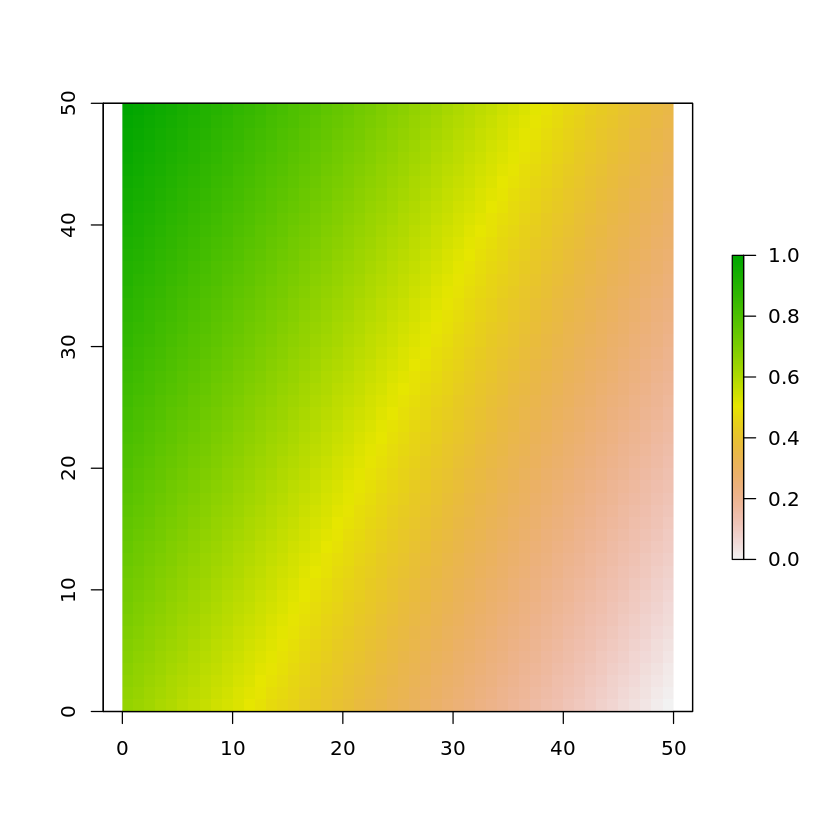

In [6]:
plot(temp_ras)

In [14]:
p <- st_read(system.file("external/lux.shp", package="raster"))
p

Reading layer `lux' from data source 
  `/opt/conda/envs/user_default/lib/R/library/raster/external/lux.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 12 features and 5 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 5.74414 ymin: 49.44781 xmax: 6.528252 ymax: 50.18162
Geodetic CRS:  WGS 84


ID_1,NAME_1,ID_2,NAME_2,AREA,geometry
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<POLYGON [°]>
1,Diekirch,1,Clervaux,312,POLYGON ((6.026519 50.17767...
1,Diekirch,2,Diekirch,218,POLYGON ((6.178368 49.87682...
1,Diekirch,3,Redange,259,POLYGON ((5.881378 49.87015...
1,Diekirch,4,Vianden,76,POLYGON ((6.131309 49.97256...
1,Diekirch,5,Wiltz,263,POLYGON ((5.977929 50.02602...
2,Grevenmacher,6,Echternach,188,POLYGON ((6.385532 49.83703...
2,Grevenmacher,7,Remich,129,POLYGON ((6.316665 49.62337...
2,Grevenmacher,12,Grevenmacher,210,POLYGON ((6.425158 49.73164...
3,Luxembourg,8,Capellen,185,POLYGON ((5.998312 49.69992...


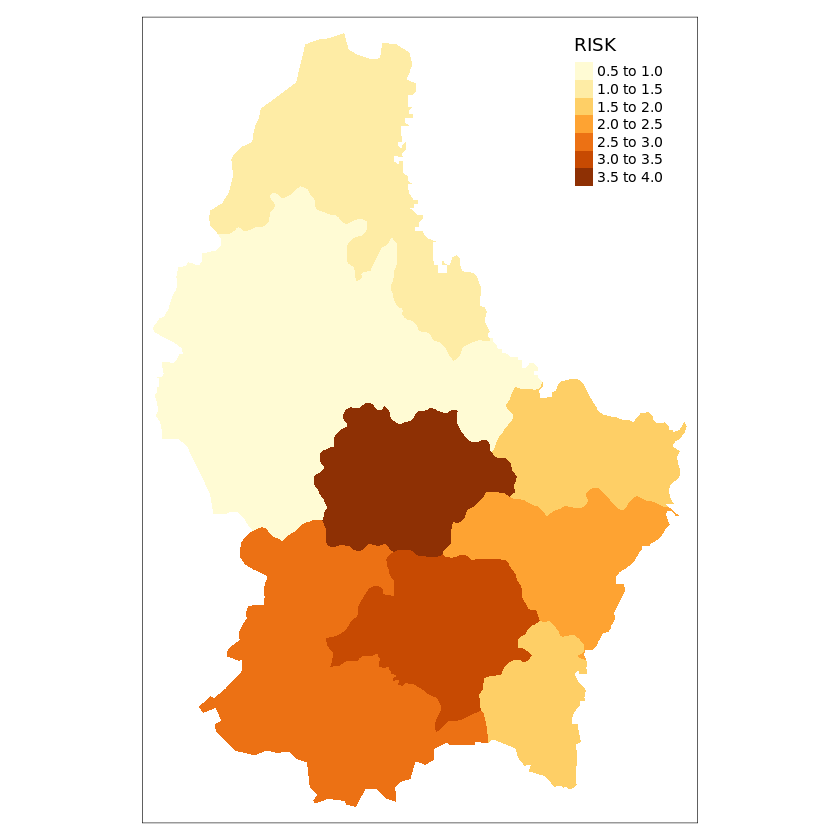

In [26]:
p$RISK <- as.numeric(p$ID_1) + rnorm(12, 0, 0.5)
tm_shape(p) +
tm_fill("RISK")

In [29]:
st_write(p, "./data/shp/lux/lux.shp")

Writing layer `lux' to data source 
  `./data/shp/lux/lux.shp' using driver `ESRI Shapefile'
Writing 12 features with 6 fields and geometry type Polygon.


In [31]:
library(Guerry)

In [32]:
gfrance <- st_as_sf(gfrance)

In [33]:
gfrance

CODE_DEPT COUNT AVE_ID_GEO dept Region Department          Crime_pers
0  01        1        49       1   E      Ain                 28870     
1  02        1       812       2   N      Aisne               26226     
2  03        1      1418       3   C      Allier              26747     
3  04        1      1603       4   E      Basses-Alpes        12935     
4  05        1      1802       5   E      Hautes-Alpes        17488     
5  07        1      2249       7   S      Ardeche              9474     
6  08        1     35395       8   N      Ardennes            35203     
7  09        1      2526       9   S      Ariege               6173     
8  10        1     34410      10   E      Aube                19602     
9  11        1      2807      11   S      Aude                15647     
10 12        1      3369      12   S      Aveyron              8236     
11 13        1      3515      13   S      Bouches-du-Rhone    13409     
12 14        1      3667      14   N      Calvados            17577     
13 15        1      4268      15   C      Cantal              18070     
14 16        1      4527      16   W      Charente            24964     
15 17        1      5205      17   W      Charente-Inferieure 18712     
16 18        1      5417      18   C      Cher                21934     
17 19        1      5942      19   C      Correze             15262     
18 21        1      6174      21   E      Cote-d'Or           32256     
19 22        1     33634      22   W      Cotes-du-Nord       28607     
20 23        1      6735      23   C      Creuse              37014     
21 24        1      7186      24   W      Dordogne            21585     
22 25        1      7482      25   E      Doubs               11560     
23 26        1      8370      26   E      Drome               13396     
24 27        1      8612      27   N      Eure                14795     
25 28        1      9143      28   C      Eure-et-Loir        21368     
26 29        1      9659      29   W      Finistere           29872     
27 30        1     10264      30   S      Gard                13115     
28 31        1     10962      31   S      Haute-Garonne       18642     
29 32        1     11008      32   S      Gers                18642     
⋮  ⋮         ⋮     ⋮          ⋮    ⋮      ⋮                   ⋮         
56 59        1     36521.0     59  N      Nord                26740     
57 60        1     20823.0     60  N      Oise                28180     
58 61        1     21456.0     61  N      Orne                28329     
59 62        1     21990.0     62  N      Pas-de-Calais       23101     
60 63        1     22829.0     63  C      Puy-de-Dome         17256     
61 64        1     23572.0     64  W      Basses-Pyrenees     16722     
62 65        1     24112.0     65  S      Hautes-Pyrenees     12223     
63 66        1     24280.0     66  S      Pyrenees-Orientales  6728     
64 67        1     24814.0     67  E      Bas-Rhin            12309     
65 68        1     24947.0     68  E      Haut-Rhin            7343     
66 69        1     25381.0     69  E      Rhone               18793     
67 70        1     26063.0     70  E      Haute-Saone         22339     
68 71        1     26357.0     71  E      Saone-et-Loire      28391     
69 72        1     26842.0     72  C      Sarthe              33913     
70 75        4     31560.0     75  N      Seine               13945     
71 76        1     28118.0     76  N      Seine-Inferieure    18355     
72 77        1     28566.0     77  N      Seine-et-Marne      22201     
73 78        3     31598.0     78  N      Seine-et-Oise       12477     
74 79        1     29204.0     79  W      Deux-Sevres         18400     
75 80        1     29360.0     80  N      Somme               33592     
76 81        1     30128.0     81  S      Tarn                13019     
77 82        1     30546.0     82  S      Tarn-et-Garonne     14790     
78 83        1     30753.0     83  S      Var                